In [21]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.2MB/s]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)  # please do not remove this line

def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    # Thêm một cột hằng số 1.0 vào đầu dữ liệu (bias term)
    bias_column = np.ones((features_X.shape[0], 1))
    features_X = np.c_[(bias_column, features_X)]

    return features_X, sales_Y

In [23]:
 features_X, _ = load_data_from_file()
 print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [24]:
 _, sales_Y = load_data_from_file()
 print(sales_Y.shape)

(200,)


In [25]:
def create_individual(n=4, bound=10):
    individual = []

    # Khởi tạo n giá trị ngẫu nhiên cho mỗi gene trong khoảng [-bound/2, bound/2]
    for i in range(n):
        gene = random.uniform(-bound / 2, bound / 2)
        individual.append(gene)

    return individual

# Gọi hàm để tạo một cá thể
individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [26]:
import numpy as np

# Giả sử hàm load_data_from_file() đã tồn tại và trả về features_X, sales_Y

def compute_loss(individual):
    theta = np.array(individual)  # Biến individual là vector theta
    y_hat = features_X.dot(theta)  # Dự đoán y_hat từ features_X và theta
    # Tính độ sai lệch (loss) bình phương trung bình
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    # Tính toán loss cho individual
    loss = compute_loss(individual)

    # Tính fitness value
    fitness_value = 1 / (loss + 1)

    return fitness_value

# Ví dụ về việc sử dụng hàm
features_X, sales_Y = load_data_from_file()

# Tạo một cá thể ngẫu nhiên
individual = [4.09, 4.82, 3.10, 4.02]

fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [27]:
def crossover(individual1, individual2, crossover_rate=0.9):
    # Tạo bản sao của individual để không làm thay đổi cá thể gốc
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    # Thực hiện trao đổi gene dựa trên tỉ lệ crossover_rate
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            # Hoán đổi gene giữa individual1 và individual2
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

# Ví dụ về việc sử dụng hàm crossover
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)

print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [28]:
import random

def mutate(individual, mutation_rate=0.05, bound=10):
    # Tạo bản sao của individual để không làm thay đổi cá thể gốc
    individual_m = individual.copy()

    # Thực hiện đột biến với mỗi gene trong cá thể
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            # Thay thế gene này bằng một giá trị ngẫu nhiên trong khoảng [-bound/2, bound/2]
            individual_m[i] = random.uniform(-bound / 2, bound / 2)

    return individual_m

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)

print(before_individual == after_individual)

False


In [29]:
 def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [30]:
def selection(sorted_old_population, m=100):
    # Chọn ngẫu nhiên 2 chỉ số cá thể khác nhau trong quần thể
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break

    # So sánh và chọn cá thể có chỉ số cao hơn (cá thể tốt hơn)
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [31]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)  # Kích thước quần thể
    # Sắp xếp quần thể cũ dựa trên giá trị fitness
    sorted_population = sorted(old_population, key=compute_fitness)

    # In ra thông tin về cá thể tốt nhất trong mỗi thế hệ (cứ mỗi thế hệ chẵn)
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])

    new_population = []

    # Thực hiện tạo quần thể mới
    while len(new_population) < m - elitism:
        # Selection: Chọn 2 cá thể từ quần thể cũ
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # Crossover: Tạo cá thể mới bằng cách kết hợp hai cá thể cha mẹ
        child1, child2 = crossover(parent1, parent2)

        # Mutation: Áp dụng đột biến cho cá thể con
        child1 = mutate(child1)
        child2 = mutate(child2)

        # Thêm các cá thể con vào quần thể mới
        new_population.append(child1)
        if len(new_population) < m - elitism:
            new_population.append(child2)

    # Elitism: Giữ lại những cá thể tốt nhất từ quần thể cũ (sao chép các cá thể tốt nhất)
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)

    # Trả về quần thể mới và giá trị loss của cá thể tốt nhất
    return new_population, compute_loss(sorted_population[m-1])

In [32]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [41]:
def run_GA():
    global population
    n_generations = 100  # Số lượng thế hệ
    m = 600  # Số lượng cá thể trong quần thể
    features_X, sales_Y = load_data_from_file()  # Nạp dữ liệu
    population = initializePopulation(m)  # Khởi tạo quần thể ban đầu
    losses_list = []  # Danh sách chứa giá trị loss của từng thế hệ

    # Lặp qua các thế hệ
    for i in range(n_generations):
        # Tạo quần thể mới
        new_population, best_loss = create_new_population(population, elitism=2, gen=i)

        # Cập nhật quần thể
        population = new_population

        # Lưu lại giá trị loss của cá thể tốt nhất trong thế hệ này
        losses_list.append(best_loss)

    return losses_list

Best loss: 689.3929259469218 with chromosome:  [-2.7650101560335214, 0.22629875689117718, 0.018981669896204423, 0.17848754654456034]
Best loss: 217.92209185888328 with chromosome:  [2.0918604646163965, 0.13918985977749987, 0.12651792861534528, -0.5387804809671559]
Best loss: 217.92209185888328 with chromosome:  [2.0918604646163965, 0.13918985977749987, 0.12651792861534528, -0.5387804809671559]
Best loss: 45.88949184095561 with chromosome:  [-0.6963785775786837, 0.09733166150892902, 0.29191915510180966, -0.019451653564164673]
Best loss: 45.88949184095561 with chromosome:  [-0.6963785775786837, 0.09733166150892902, 0.29191915510180966, -0.019451653564164673]
Best loss: 39.57959448649281 with chromosome:  [-0.6963785775786837, 0.09733166150892902, -0.08081460230407522, -0.019451653564164673]
Best loss: 39.57959448649281 with chromosome:  [-0.6963785775786837, 0.09733166150892902, -0.08081460230407522, -0.019451653564164673]
Best loss: 23.729719404431467 with chromosome:  [3.03744107475344

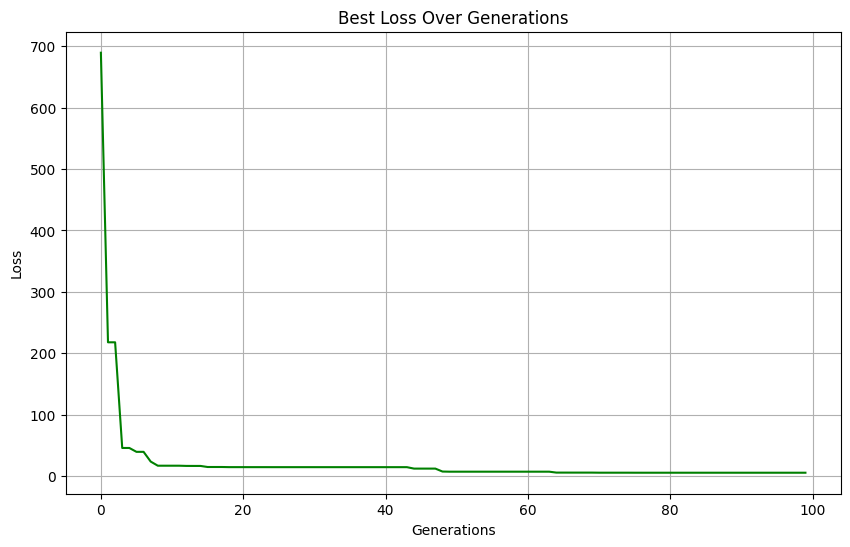

In [43]:
def visualize_loss(losses_list):
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(losses_list, color='green')  # Vẽ đường biểu diễn với màu xanh lá

    # Đặt tên cho trục và tiêu đề
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.title('Best Loss Over Generations')

    # Hiển thị biểu đồ
    plt.grid(True)
    plt.show()

# Giả sử bạn đã có danh sách losses từ hàm run_GA
losses_list = run_GA()

# Hiển thị biểu đồ
visualize_loss(losses_list)

[1.5917696428079608, 0.0739235439958037, 0.12651792861534528, -0.008972473473125575]


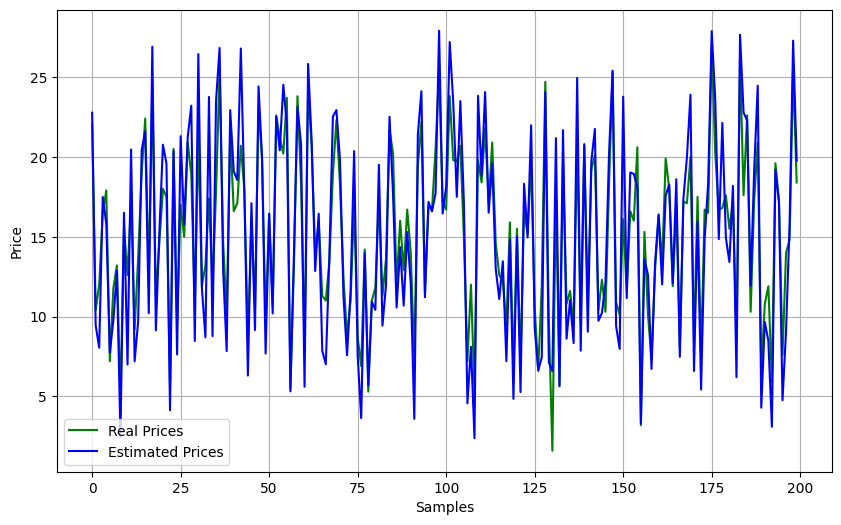

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predict_gt():
    global population
    # Sắp xếp quần thể dựa trên giá trị fitness và lấy cá thể tốt nhất
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])  # In cá thể tốt nhất

    # Lấy vector theta từ cá thể tốt nhất
    theta = np.array(sorted_population[-1])

    # Dự đoán giá trị sales dựa trên các đặc trưng đầu vào (features_X)
    estimated_prices = []
    for feature in features_X:
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)

    # Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')

    # Vẽ giá trị thực tế (Real Prices) với màu xanh lá cây
    plt.plot(sales_Y, color='green', label='Real Prices')

    # Vẽ giá trị dự đoán (Estimated Prices) với màu xanh dương
    plt.plot(estimated_prices, color='blue', label='Estimated Prices')

    # Hiển thị chú thích và biểu đồ
    plt.legend()
    plt.grid(True)
    plt.show()

# Giả sử quần thể và dữ liệu đã được nạp và xử lý
visualize_predict_gt()